In [10]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

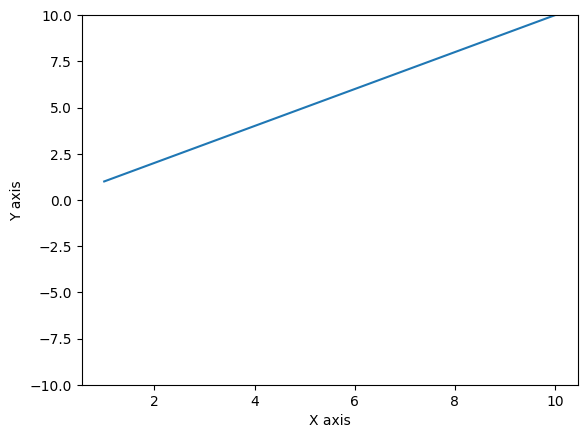

In [6]:
k = np.array([1,2,3,4,5,6,7,8,9,10])

fig,ax = plt.subplots()
ax.plot(k,k)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_ylim([-10,10])
plt.show()


def generate_user_follow_suggestions(user):
    logged_user = user.user.username
    social_g = {
    }
    profiles = Profile.objects.all()
    
    Social = nx.Graph()
    
    # Get list of usernames
    usernames = []
    for profile in profiles:
        usernames.append(profile.user.username)
    # Print usernames  
    #print(usernames)
    # Create graph from usernames 
    Social.add_nodes_from(usernames)
    # Verify node count
    #print(len(Social.nodes())) 
    # Add edges
    for profile in profiles:
        username = profile.user.username
        followers = profile.followers.all()
        social_g[username] = list(followers)
    
    for key, value in social_g.items():
        social_g[key] = [str(v).removeprefix("<User: ") for v in value]
    for user, followers in social_g.items():
        for follower in followers:
            Social.add_edge(user, follower)
    #print(Social.edges)
    
    suggestions = []
    degree_centrality = nx.degree_centrality(Social)
    eigenvector_centrality = nx.eigenvector_centrality(Social, max_iter=1000)
    sorted_users = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
    user_to_recommend = logged_user
    print(degree_centrality)

    
    if(degree_centrality[user_to_recommend] == 0.0): # for cold start case
        print("case 1 triggered")
        print(list(nx.articulation_points(Social)))
        suggestions += list(nx.articulation_points(Social))
        for user, centrality in sorted_users:
            if user != user_to_recommend and Social.has_edge(user_to_recommend, user) == False and user not in suggestions:
                suggestions.append(user)
                if len(suggestions) >= 5:  # Limit the number of recommendations
                    break

    else:
        print("case 1 triggered")
        pagerank_scores = nx.pagerank(Social)
        print("pg", pagerank_scores)
        #neighbours = list(Social.neighbors(logged_user))
        n = 5
        #print(neighbours)
        neighbours_sorted = sorted(Social,
            key= lambda x: pagerank_scores[x], reverse=True)
        print(neighbours_sorted)
        neighbours_sorted.remove(user_to_recommend)
        suggestions += neighbours_sorted[:n]

    return suggestions[:3]

##### first workout for cold start
one way is to recommend the popular nodes to the new node

In [34]:
def generate_user_follow_suggestions(user : str , G : nx.Graph) -> list:
    # find the degree centrality of user to check if the user is new or not
    degree = nx.degree_centrality(G)
    
    user_degree = degree[user]
    if(user_degree == 0.0):
        print("Condition of Cold Start")
        

In [44]:
# get the edge data from edges.txt and convert it to list
df = pd.read_csv("edges.txt", header=None)
# df_list = df.values.tolist()
df_list = [tuple(x) for x in df.itertuples(index=False)]
print(df_list)

[('Aryan', 'Adya'), ('Aryan', 'Vijay'), ('Aryan', 'Ragha'), ('Aryan', 'Abhay'), ('Aryan', 'Anu'), ('Aryan', 'Balaji'), ('Aryan', 'Nigga'), ('Aryan', 'Sahil'), ('Adya', 'Vijay'), ('Adya', 'Abhishek'), ('Adya', 'Balaji'), ('Adya', 'Sahil'), ('Vijay', 'Abhay'), ('Vijay', 'Abhishek'), ('Vijay', 'Ragha'), ('Vijay', 'Sahil'), ('Ragha', 'Abhay'), ('Ragha', 'Akash'), ('Abhishek', 'Abhay'), ('Abhay', 'Anu'), ('Abhay', 'Balaji'), ('Anu', 'Balaji'), ('Balaji', 'Akash'), ('Siddu', 'Sahil'), ('Siddu', 'Vikram'), ('Siddu', 'Tharun'), ('Vikram', 'Tharun')]


In [66]:
graph = nx.Graph()
graph.add_edges_from(df_list)

graph.add_node('v')

g = nx.Graph()
nx.
k = list(nx.articulation_points(g))


TypeError: '_io.TextIOWrapper' object is not callable

In [35]:
generate_user_follow_suggestions('v', graph)

condition of Cold start
